<a href="https://colab.research.google.com/github/sihyun10/Deeplearning_class/blob/main/deeplearning%5B8%5D__%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#순환 데이터의 예시
#데이터를 다운로드하고 그래프로 그려보자

#BeautifulSoup4와 finance-datareader 설치하기
!pip install BeautifulSoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#라이브러리 포함
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#삼성전자 코드 = '005930', 2020년 데이터부터 다운로드
samsung = fdr.DataReader('005930','2020')

In [8]:
#시작가만 취함
seq_data = (samsung[['Open']]).to_numpy()

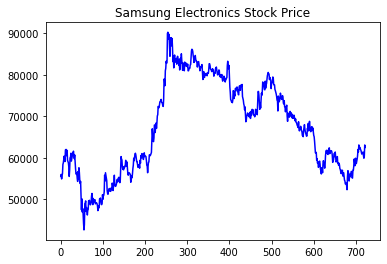

In [9]:
#선형 그래프 그려보기
plt.plot(seq_data,color='blue')
plt.title("Samsung Electronics Stock Price")
plt.xlabel("Days")
plt.xlabel("")
plt.show()

In [10]:
#데이터를 잘라서 샘플을 작성해보자!
seq_data = (samsung[['Open']]).to_numpy()

In [11]:
def make_sample(data,window):
  train=[]  #공백 리스트 생성
  target=[]
  for i in range(len(data) - window):  #데이터 길이만큼 반복
    train.append(data[i: i + window]) #i부터 (i+window-1)까지 저장
    target.append(data[i+window]) #(i+window)번째 요소는 정답
  return np.array(train), np.array(target) #훈련 샘플과 정답 라벨을 변환

In [12]:
X,y = make_sample(seq_data,7) #윈도우 크기 : 7
print(X.shape,y.shape) #Numpy 배열의 형상 출력
print(X[0],y[0]) #첫 번째 샘플 출력

(716, 7, 1) (716, 1)
[[55500]
 [56000]
 [54900]
 [55700]
 [56200]
 [58400]
 [58800]] [59600]


In [1]:
#순환 신경망의 예시
#사인파(Sine Wave) 예측 프로그램을 구성해보자!

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
def make_sample(data,window):
  train = []   #공백 리스트 생성
  target = []
  for i in range(len(data)-window):   #데이터의 길이만큼 반복
    train.append(data[i:i+window])   #i부터 (i+window-1)까지를 저장
    target.append(data[i+window])  #(i+window)번째 요소는 정답
  return np.array(train),np.array(target)  #Python 리스트를 Numpy로 변환

In [3]:
seq_data = []
for i in np.arange(0,1000):
  seq_data += [[np.sin(np.pi*i*0.01)]]
X,y = make_sample(seq_data,10)  #윈도우 크기 : 10

In [4]:
model = Sequential()
model.add(SimpleRNN(10,activation = 'tanh',input_shape=(10,1)))
model.add(Dense(1,activation='tanh'))
model.compile(optimizer='adam',loss='mse')

Epoch 1/100
31/31 [==============================] - 1s 4ms/step - loss: 0.0142
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0071
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 8/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 9/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 10/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 11/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 12/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 13/100
31/31 [=================

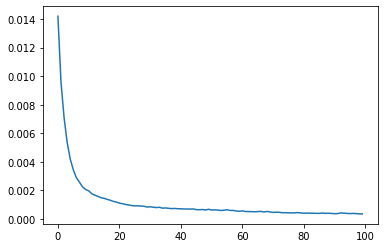

In [5]:
history=model.fit(X,y,epochs=100,verbose=1)
plt.plot(history.history['loss'],label='loss')
plt.show()

In [6]:
seq_data = []
for i in np.arange(0,1000):  #테스트 샘플 생성
  seq_data += [[np.cos(np.pi * i * 0.01)]]
X,y = make_sample(seq_data, 10)  #윈도우 크기 : 10

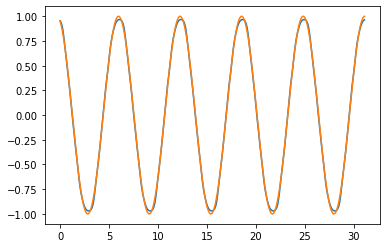

In [7]:
y_pred = model.predict(X,verbose=0)  #테스트 예측값
plt.plot(np.pi * np.arange(0,990)*0.01, y_pred)
plt.plot(np.pi * np.arange(0,990)*0.01, y)
plt.show()

In [8]:
#Keras를 이용한 주가 예측
 #Keras에서 LSTM 모델 구성하기 (연습)

import tensorflow as tf
inputs = tf.random.normal([32,10,8])
lstm = tf.keras.layers.LSTM(4)
output=lstm(inputs)
print(output.shape)
print(output)

(32, 4)
tf.Tensor(
[[-0.04372483  0.11780276  0.05280462 -0.02340342]
 [-0.26699027  0.16536151 -0.48442546  0.15149179]
 [ 0.06196355  0.20524639  0.15845747 -0.25921017]
 [ 0.13114516 -0.04961776 -0.01717955  0.24465846]
 [-0.03061854  0.03615081  0.04059164 -0.31967682]
 [-0.07399786  0.19370236  0.127366   -0.27795416]
 [-0.26464355 -0.25114408 -0.24454464  0.20002972]
 [ 0.0386877  -0.07545298  0.23153056 -0.50461423]
 [ 0.07040129  0.12432614  0.01970621  0.2986362 ]
 [-0.1963189  -0.0499565  -0.05497883  0.06828728]
 [ 0.00201772 -0.0696418   0.17661749  0.39013687]
 [-0.5190209  -0.49581218 -0.21516076  0.07278129]
 [ 0.04849932  0.5645696  -0.2117426  -0.14258304]
 [-0.2461753  -0.21465603 -0.06415062 -0.11891473]
 [ 0.34675726  0.0336913   0.1834435  -0.29234135]
 [-0.16469617 -0.11630774 -0.01182317 -0.4145829 ]
 [-0.74426496 -0.38294968 -0.07720482  0.00274427]
 [-0.02481755  0.34974304 -0.04449996 -0.16201189]
 [-0.06286241 -0.19040494  0.07565498 -0.17633529]
 [ 0.0192909

In [11]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
samsung = fdr.DataReader('005930','2016')
print(samsung)

             Open   High    Low  Close    Volume    Change
Date                                                      
2016-01-04  25200  25200  24100  24100    306939 -0.043651
2016-01-05  24040  24360  23720  24160    216002  0.002490
2016-01-06  24160  24160  23360  23500    366752 -0.027318
2016-01-07  23320  23660  23020  23260    282388 -0.010213
2016-01-08  23260  23720  23260  23420    257763  0.006879
...           ...    ...    ...    ...       ...       ...
2022-11-28  60500  60500  59800  60100   8589032 -0.014754
2022-11-29  59900  60600  59800  60600   7014160  0.008319
2022-11-30  60400  62200  60200  62200  19768903  0.026403
2022-12-01  63100  63200  62300  62600  16631445  0.006431
2022-12-02  62500  62500  60400  60400  15113978 -0.035144

[1702 rows x 6 columns]


In [14]:
openValues = samsung[['Open']]

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(openValues)

In [16]:
TEST_SIZE = 200
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]

In [18]:
def make_sample(data, window):
  train = []
  target = []
  for i in range(len(data)-window):
    train.append(data[i:i+window])
    target.append(data[i+window])
  return np.array(train),np.array(target)

X_train,y_train = make_sample(train_data,30)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model = Sequential()
model.add(LSTM(16,input_shape=(X_train.shape[1],1),
               activation='tanh',return_sequences=False))
model.add(Dense(1))

In [21]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=16)

Epoch 1/100
92/92 [==============================] - 3s 9ms/step - loss: 0.0640
Epoch 2/100
92/92 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 3/100
92/92 [==============================] - 1s 8ms/step - loss: 0.0013
Epoch 4/100
92/92 [==============================] - 1s 9ms/step - loss: 0.0012
Epoch 5/100
92/92 [==============================] - 2s 16ms/step - loss: 0.0012
Epoch 6/100
92/92 [==============================] - 1s 12ms/step - loss: 0.0012
Epoch 7/100
92/92 [==============================] - 1s 11ms/step - loss: 0.0012
Epoch 8/100
92/92 [==============================] - 1s 10ms/step - loss: 0.0012
Epoch 9/100
92/92 [==============================] - 1s 10ms/step - loss: 0.0012
Epoch 10/100
92/92 [==============================] - 1s 10ms/step - loss: 0.0012
Epoch 11/100
92/92 [==============================] - 1s 10ms/step - loss: 0.0011
Epoch 12/100
92/92 [==============================] - 1s 11ms/step - loss: 0.0011
Epoch 13/100
92/92 [=========

In [22]:
X_test, y_test = make_sample(test_data,30)
pred = model.predict(X_test)

6/6 [==============================] - 0s 4ms/step


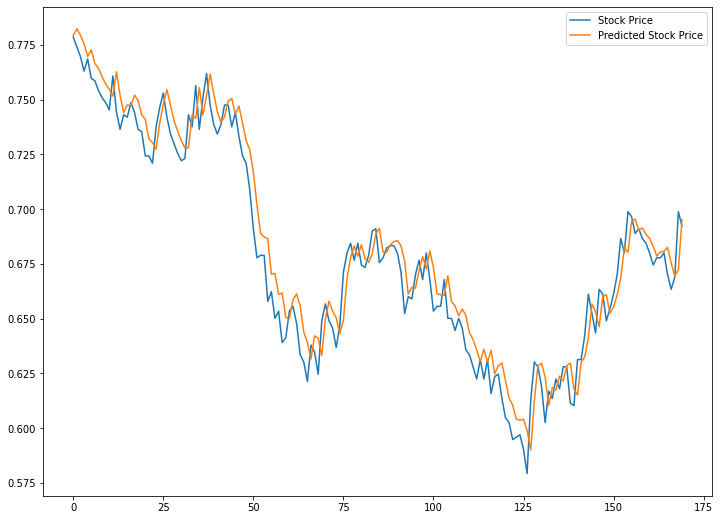

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
plt.plot(y_test,label='Stock Price')
plt.plot(pred,label='Predicted Stock Price')
plt.legend()
plt.show()